# Лабораторная работа №1

## Наивный Байесовский классификатор
#### Фазылова Алика группа:5140201/30301

### Задание 1
Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации или на вероятность ошибочной классификации в примере крестики-нолики и примере о спаме e-mail сообщений. 

### Обучающее множество: Tic Tac Toe (крестики-нолики)

"x" начинает первым. Цель: "победа x"
Признаки (категориальные – 3 значения):
1. top-left-square: {x,o,b} 
2. top-middle-square: {x,o,b} 
3. top-right-square: {x,o,b} 
4. middle-left-square: {x,o,b} 
5. middle-middle-square: {x,o,b} 
6. middle-right-square: {x,o,b} 
7. bottom-left-square: {x,o,b} 
8. bottom-middle-square: {x,o,b} 
9. bottom-right-square: {x,o,b} 

3 класса: {positive,negative}


In [58]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder


In [57]:
# Импортируем данные
data = pd.read_csv("Tic_tac_toe.txt", sep=",")

# Выделим признаки и классы
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Проведем кодирование категориальных данных
X = X.replace(['x', 'o', 'b'],[0,1,2])
y = y.replace(['negative', 'positive'],[0,1])


for train_size in range(10, 91, 10):
    # Разделим на обучающую и тестовую выборки,их размеры меняются с циклом
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=34543)

    # Используем модель наивного байесовского классификатора
    classifier = CategoricalNB()
    classifier.fit(X_train, y_train)

    # Проведем прогнозирование на тестовой выборке 
    predict = classifier.predict(X_test)

    # Оценим полученную модель
    accuracy = round((accuracy_score(y_test, predict))*100,2)
    print(f"Для размера обучающей выборки: {train_size}%, точность модели составляет: {accuracy}%")
    
 


Для размера обучающей выборки: 10%, точность модели составляет: 69.03%
Для размера обучающей выборки: 20%, точность модели составляет: 71.41%
Для размера обучающей выборки: 30%, точность модели составляет: 71.19%
Для размера обучающей выборки: 40%, точность модели составляет: 74.26%
Для размера обучающей выборки: 50%, точность модели составляет: 73.9%
Для размера обучающей выборки: 60%, точность модели составляет: 75.2%
Для размера обучающей выборки: 70%, точность модели составляет: 72.57%
Для размера обучающей выборки: 80%, точность модели составляет: 75.52%
Для размера обучающей выборки: 90%, точность модели составляет: 77.08%


### Обучающее множество: Данные о спаме e-mail сообщений
Данные собраны Hewlett-Packard Labs, которая классифицировала 4601 e-mail сообщений как спам или не спам. 57 признаков, содержащих частоты определенных слов, соответствующих названию признака и букв в сообщениях. Данные содержат 2788 e-mail сообщений, классифицируемых как "не спам" (0) and 1813 сообщений, классифицируемых как "спам" (1). Часть признаков – частоты определенных слов, соответствующих названию признака. Часть признаков связана с числом заглавных букв в письме. 


In [59]:
# Импортируем данные 
data = fetch_openml(data_id=44,parser='auto')

# Преобразовываем в DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Выделим признаки и классы
X = df.drop(columns=['target'])
y = df['target']

for train_size in range(10, 91, 10):
    # Разделим на обучающую и тестовую выборки,их размеры меняются с циклом
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=1232221)

    # Используем модель наивного байесовского классификатора
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)

    # Проведем прогнозирование на тестовой выборке 
    predict = classifier.predict(X_test)

    # Оценим полученную модель
    accuracy = round((accuracy_score(y_test, predict))*100,2)
    print(f"Для размера обучающей выборки: {train_size}%, точность модели составляет: {accuracy}%")

Для размера обучающей выборки: 10%, точность модели составляет: 78.34%
Для размера обучающей выборки: 20%, точность модели составляет: 78.78%
Для размера обучающей выборки: 30%, точность модели составляет: 79.11%
Для размера обучающей выборки: 40%, точность модели составляет: 79.43%
Для размера обучающей выборки: 50%, точность модели составляет: 78.1%
Для размера обучающей выборки: 60%, точность модели составляет: 78.54%
Для размера обучающей выборки: 70%, точность модели составляет: 79.22%
Для размера обучающей выборки: 80%, точность модели составляет: 78.94%
Для размера обучающей выборки: 90%, точность модели составляет: 81.13%


### Задание 2

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что первые 50 точек (class -1) имеют параметры: мат. ожидание X1  равно 10, мат. ожидание X2 равно 14, среднеквадратические отклонения для обеих переменных равны 4. Вторые 50 точек (class +1) имеют параметры: мат. ожидание X1 равно 20, мат. ожидание X2 равно 18, среднеквадратические отклонения для обеих переменных равны 3. Построить соответствующие диаграммы, иллюстрирующие данные. Построить байесовский классификатор и оценить качество классификации. 


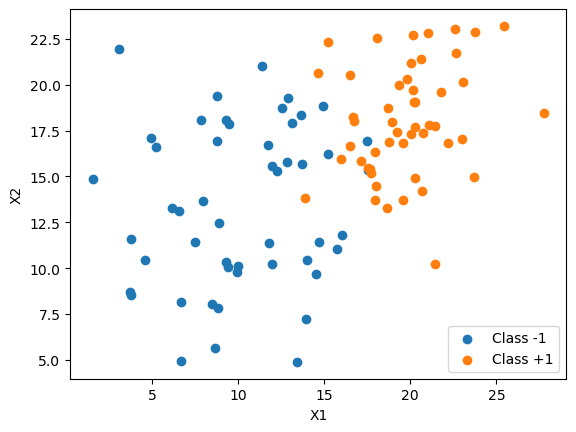

Для размера обучающей выборки: 10%, точность модели составляет: 78.89%
Для размера обучающей выборки: 20%, точность модели составляет: 92.5%
Для размера обучающей выборки: 30%, точность модели составляет: 95.71%
Для размера обучающей выборки: 40%, точность модели составляет: 96.67%
Для размера обучающей выборки: 50%, точность модели составляет: 96.0%
Для размера обучающей выборки: 60%, точность модели составляет: 97.5%
Для размера обучающей выборки: 70%, точность модели составляет: 96.67%
Для размера обучающей выборки: 80%, точность модели составляет: 95.0%
Для размера обучающей выборки: 90%, точность модели составляет: 90.0%


In [60]:
#Сгенерируем данные
np.random.seed(26463)
mean1 = [10, 14]
mean2 = [20, 18]
std1 = [4, 4]
std2 = [3, 3]

Class_1 = np.random.normal(mean1, std1, (50, 2))
Class_2 = np.random.normal(mean2, std2, (50, 2))

# Создание набора признаков и классов
X = np.vstack((Class_1, Class_2))
y = np.hstack((-np.ones(50), np.ones(50)))

# Построим диаграмму
plt.scatter(Class_1[:, 0], Class_1[:, 1], label='Class -1')
plt.scatter(Class_2[:, 0], Class_2[:, 1], label='Class +1')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
     
for train_size in range(10, 91, 10):
    # Разделим на обучающую и тестовую выборки,их размеры меняются с циклом
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=1232221)

    # Используем модель наивного байесовского классификатора
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)

    # Проведем прогнозирование 
    predict = classifier.predict(X_test)

    # Оценим полученную модель
    accuracy = round((accuracy_score(y_test, predict))*100,2)
    print(f"Для размера обучающей выборки: {train_size}%, точность модели составляет: {accuracy}%")

### Задание 3
Разработать байесовский классификатор для данных Титаник (Titanic dataset) - https://www.kaggle.com/c/titanic
Исходные обучающие данные для классификации – в файле Titanic_train.csv
Данные для тестирования – в файле Titanic_test.csv
Использовать функцию read.csv для чтения данных из csv-файлов. 
Классы:   
survival        Выжил  (0 = No; 1 = Yes)  
Признаки:  
pclass         Класс каюты  (1 = 1st; 2 = 2nd; 3 = 3rd)  
name          Имя  
sex             Пол  
age             Возраст  
sibsp           Число братьев-сестер/муж-жена на борту  
parch          Число родителей/детей на борту  
ticket          Номер билета  
fare             Стоимость билета  
cabin           Каюта  
embarked    Порт посадки (C = Cherbourg; Q = Queenstown; S = Southampton)  
Специальные отметки:  
Pclass: 1st ~ Верхний; 2nd ~ Средний; 3rd ~ Нижний  
Age – в годах; дробный, если возраст меньше одного года  

 

In [63]:
# Чтение обучающих данных из файла Titanic_train.csv
train_data = pd.read_csv('Titanic_train.csv')

# Чтение тестовых данных из файла Titanic_test.csv
test_data = pd.read_csv('Titanic_test.csv')

# Объединим выборки
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Проведем предварительную подготовку данных

# Удалим столбцы, не учавствующие в анализе
combined_data.drop(columns=["PassengerId","Name", "Ticket", "Cabin" ],inplace=True)

# Заполним недостающие данные
combined_data['Age'].fillna(combined_data['Age'].mean(), inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].mean(), inplace=True)
combined_data["Embarked"].fillna(combined_data["Embarked"].mode()[0], inplace=True)

# Кодируем категориальные признаки
combined_data['Sex'] = LabelEncoder().fit_transform(combined_data['Sex'])
combined_data['Embarked'] = LabelEncoder().fit_transform(combined_data['Embarked'])

# Разделим выборки
train_data1 = combined_data[:891]
test_data1 = combined_data[891:].reset_index(drop=True)

# Выделим признаки и классы
X_train = train_data1.drop(columns=["Survived"])
y_train = train_data1["Survived"]

X_test = test_data1.drop(columns=["Survived"])
y_test = test_data1["Survived"]

# Используем модель наивного байесовского классификатора
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Проведем прогнозирование на тестовой выборке 
predict = classifier.predict(X_test)

survived = sum(predict)
died = len(predict)-survived
print("Выживших:", int(survived))
print ("Умерших:", int(died))

# Оценим точность модели на тренировочных данных
accuracy = round(classifier.score(X_train, y_train) * 100, 2)
print (f"Точность модели на тренировочных данных: {accuracy}%")

Выживших: 179
Умерших: 239
Точность модели на тренировочных данных: 79.24%
